# Telecom Churn Prediction



### 1. Introduction
- What is Customer Churn? 
- Dataset, Features and Target variable
- Problem Description

### 2. Data Exploration and Cleaning
- Load libraries and dataset
- Dimensionality & Sanity check
- Data transformation 

### 3. Descriptive Analysis
- Calculate Churn rate
- Correlation

### 4. Exploratory Data Analysis
- Distribution of feature as per Churn 
- Cluster analysis

### 5. Data Preprocessing
- Train & test data split
- Class imbalance & resampling

### 6. Model Development
- Model selection
- Model tuning
- Model evaluation

### 7. Conclusion and Strategy
- Retension Strategy

# 1. Introduction
<hr>

Customer segmentation is one of the most important metrices for growing companies to evaluate. While it's not the happiest measure, it's a number that give companies the hard truth about its customer retention strategy.

### What is Customer Chrun?
Customer Churn is the percentage of customers that stopped using company's product/service during a certain time frame. The calculation for customer churn is diving the number of customers company lost during that time period by the number of customers company had at the beginning of that time period.

For example,

If company had 400 customers at the beginning of the year and end with 360, means company's churn rate is 10%, because compant lost 10% of the the customer from the base. Most companies try to decrease churn rate as 0%.


### Datasets, Features and Target value
Source : https://www.kaggle.com/blastchar/telco-customer-churn ( IBM Sample dataset)

Here, IBM provided customer data for Telco industry to predict behavior of the customers. Main objective is that to analyze customer behaviors and develop strategies for customer retention.

Assumption - Here, data source has not provided any information related to time; So I have assumed that all the customers are for same interval. 

Dataset has information related,

#### Demographic:

- Gender - Male / Female <br>
- Age range - In terms of Partner, Dependent and Senior Citizen

#### Services:

- Phone service - If customer has Phone service, then services related to Phone like;
    - Multiline Phone service
- Internet Service - If customer has Internet service, then services related to Internet like;
    - Online security
    - Online backup
    - Device protection
    - Tech support
    - Streaming TV
    - Streaming Movies

#### Account type:

- Tenure - How long customer is with the company?
- Contract type - What kind of contract they have with a company? Like
    - Monthly bases
    - On going bases - If on going bases, then One month contract or Two year contract
- Paperless billing - Customer is paperless billion option or not?
- Payment method - What kind of payment method customer has?
    - Mailed check
    - Electronic check
    - Credit card (Automatic)
    - Bank transfer (Automatic)

#### Usage:

- Monthly charges
- Total charges

#### Target:

- Churn - Whether customer left the company or still with the company?

### Problem Description
Here, our objective is to analyze customer behaviour in terms of 
- What kind of customers are leaving company?

#### Retention Strategy
- Find out existing customers churn probability and apply retention strategy on high probability churn customers

# 2. Dataset Exploration and Cleaning
<hr>

### Load libraries and dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
data=pd.read_csv('Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Dimensionality & Sanity check

In [3]:
# Number of Columns and Rows in the Dataset
data.shape

(7043, 21)

Dataset has 7043 observations and 21 features

In [4]:
#Replacing all empty space with NaNs
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
Emp_cols=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in Emp_cols:
    data[i]=data[i].replace("",np.nan)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* Here we see that the totalcharges has 11 missing values. Let's see the complete data corresponding to these customers.

In [9]:
data[np.isnan(data['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


1. It can also be noted that the Tenure column is 0 for these entries even though the monthlycharges column is not empty.

2. Let's see if there are any other 0 values in the tenure column.

In [10]:
data[data['tenure'] == 0].index #no additional 0 values.

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [11]:
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)

### Data transformation & Renaming

* Here, we are going to  modifying records with proper format for further analysis.

In [12]:
data_main = data.copy()

In [13]:
from sklearn.preprocessing import LabelEncoder
categorical = ["gender","Partner","Dependents","SeniorCitizen","PhoneService","MultipleLines"
                    ,"InternetService","OnlineSecurity","OnlineBackup","DeviceProtection"
                    ,"TechSupport","StreamingTV","StreamingMovies","Contract"
                    ,"PaperlessBilling","PaymentMethod","Churn"]
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(data_main[col])
    data_main[col] = label_encoder.transform(data_main[col])

# 3. Descriptive Analysis

In [14]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


* Based on numerical columns descriptive analysis, average tenure, average monthly charges and total charges of subscriber is 32 months, 64 dollars and 2282 dollars, respectively.

In [15]:
data.shape

(7032, 21)

### Calculate Churn Rate

In [16]:
# Convert String values (Yes and No) of Churn column to 1 and 0
data.loc[data.Churn=='No','Churn'] = 0 
data.loc[data.Churn=='Yes','Churn'] = 1
#convert to integer .
data['Churn']=data['Churn'].astype('int32')

In [17]:
data.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, '% of Churn')

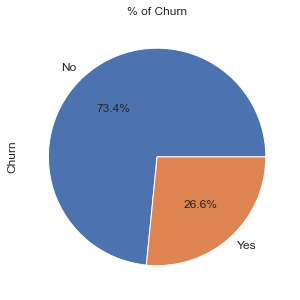

In [18]:
ax = (data['Churn'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('% of Churn', fontsize = 12)

* Telecom company's churn rate is around 26%, Meaning around 26% of the subscribers from total left the company during given interval.

### Checking the Outlier

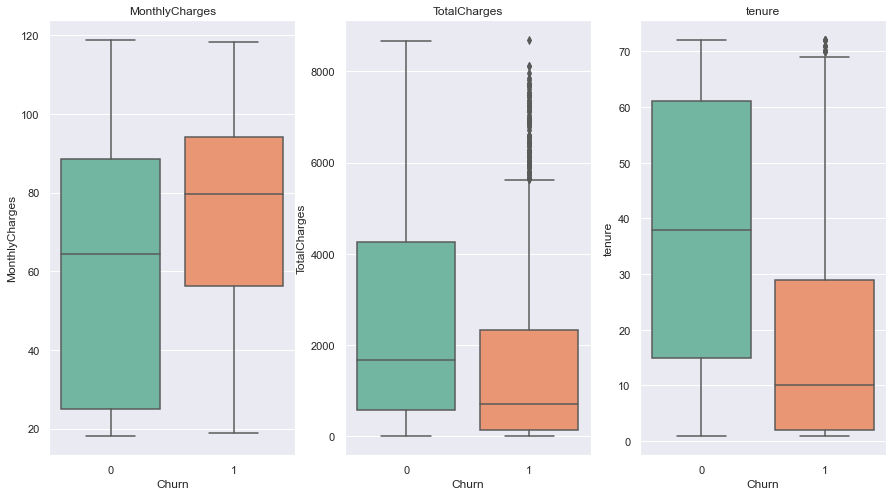

In [19]:
numerical = ["MonthlyCharges", "TotalCharges", "tenure"]

fig, ax = plt.subplots(1, 3, figsize=(15, 8))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x=data["Churn"], y=data[variable], ax=subplot, palette = "Set2").set_title(str(variable))

1. The Monthly plan doesn't seem to be such a big driver of churn, but we can see that 75% of churners pay between 60 and 100 dollars a month

2. One important mark we can see in this plots that 50% of Churners leave the company before the first year goes by.

In [20]:
num_features= ['tenure', 'MonthlyCharges', 'TotalCharges']
df_num = data[num_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

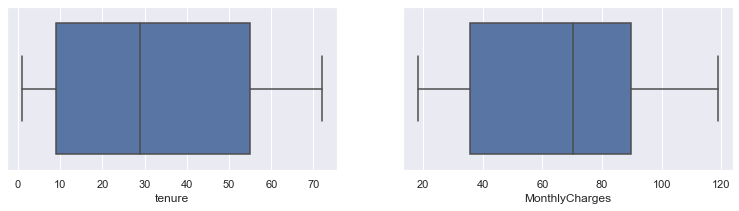

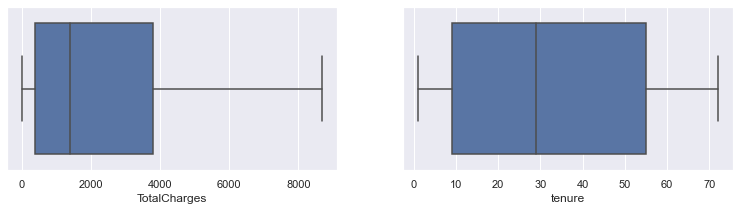

In [21]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges','tenure']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=data)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=data)
    i += 1
    
    plt.show()

* No outliers in numerical features detected with the IQR method.

### Correlation

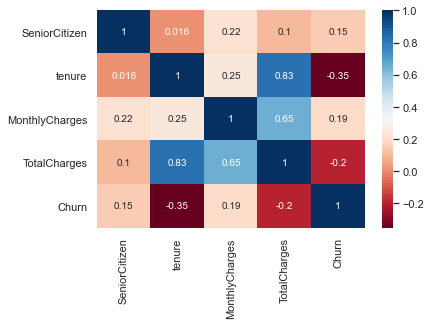

In [22]:
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()

From correlation matrix, features like Tenure, Monthly charges and Total charges are highly correlated.

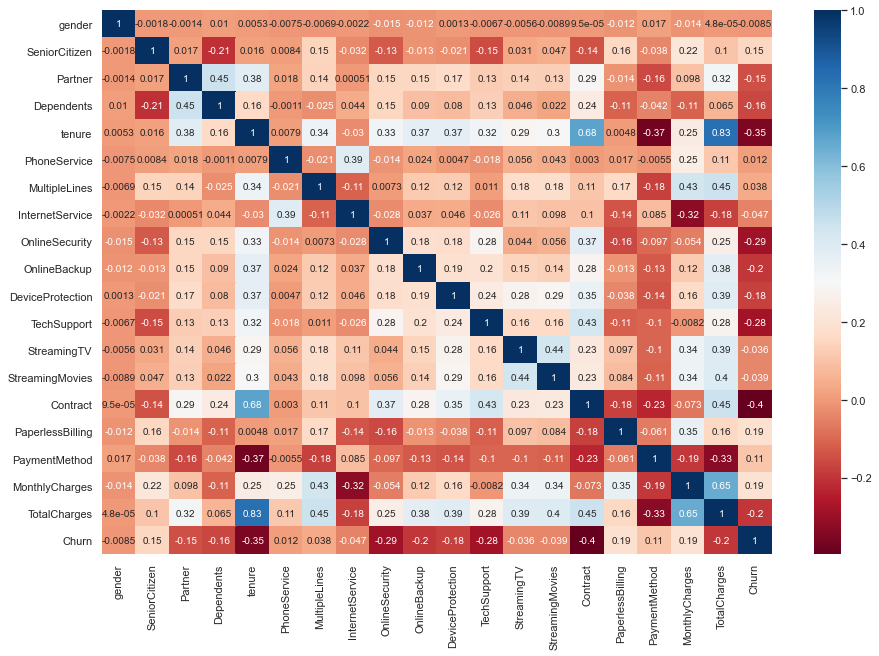

In [23]:
#specify size of heatmap
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data_main.corr(), annot=True, cmap="RdBu")
plt.show()

From correlation matrix, features like Tenure, Monthly charges and Total charges are highly correlated with services like MultipleLines of phone services and Internet services like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and Streaming Movies services.

# 4. Exploratory Data Analysis (EDA)
<hr>

### Distribution of features as per Churn 

### 1. Distribution of categorical  variables

C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

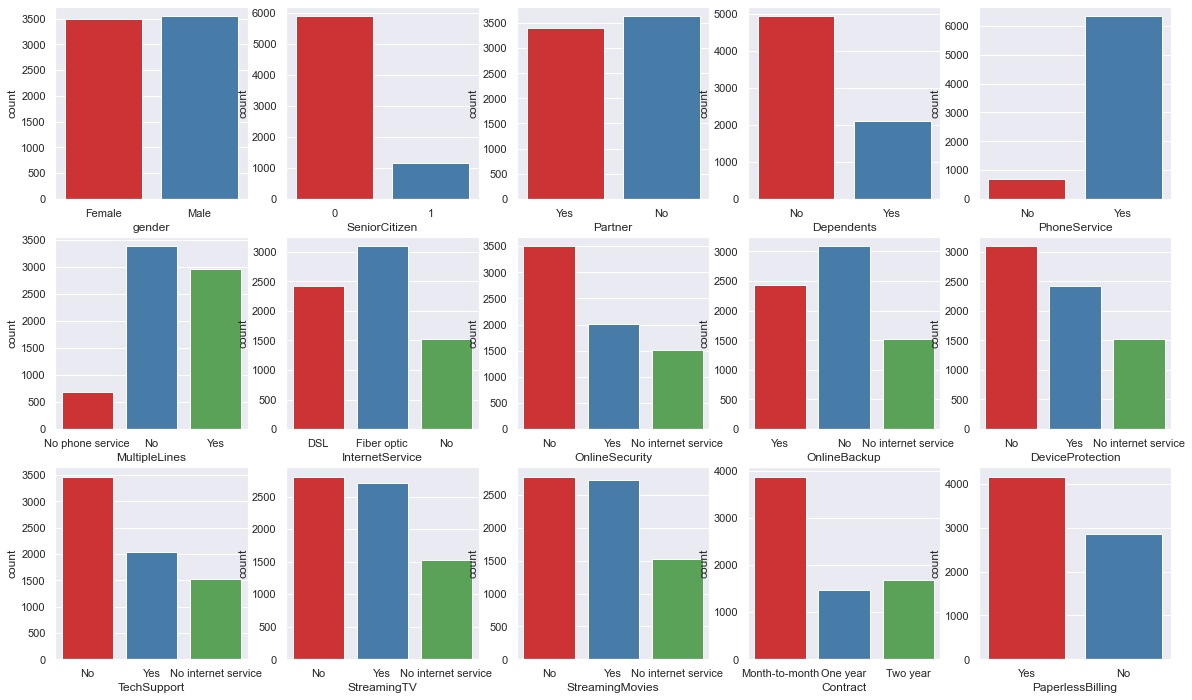

In [24]:
#visualise the distibution of data
categorical = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines",
               "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
               "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling",'PaymentMethod']
fig, ax = plt.subplots(3, 5, figsize=(20, 12))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable], ax=subplot, palette = "Set1")

C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


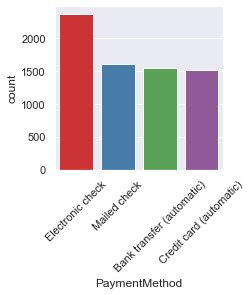

In [25]:
plt.figure(figsize=(3,3))
chart = sns.countplot(data.PaymentMethod, palette = "Set1")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

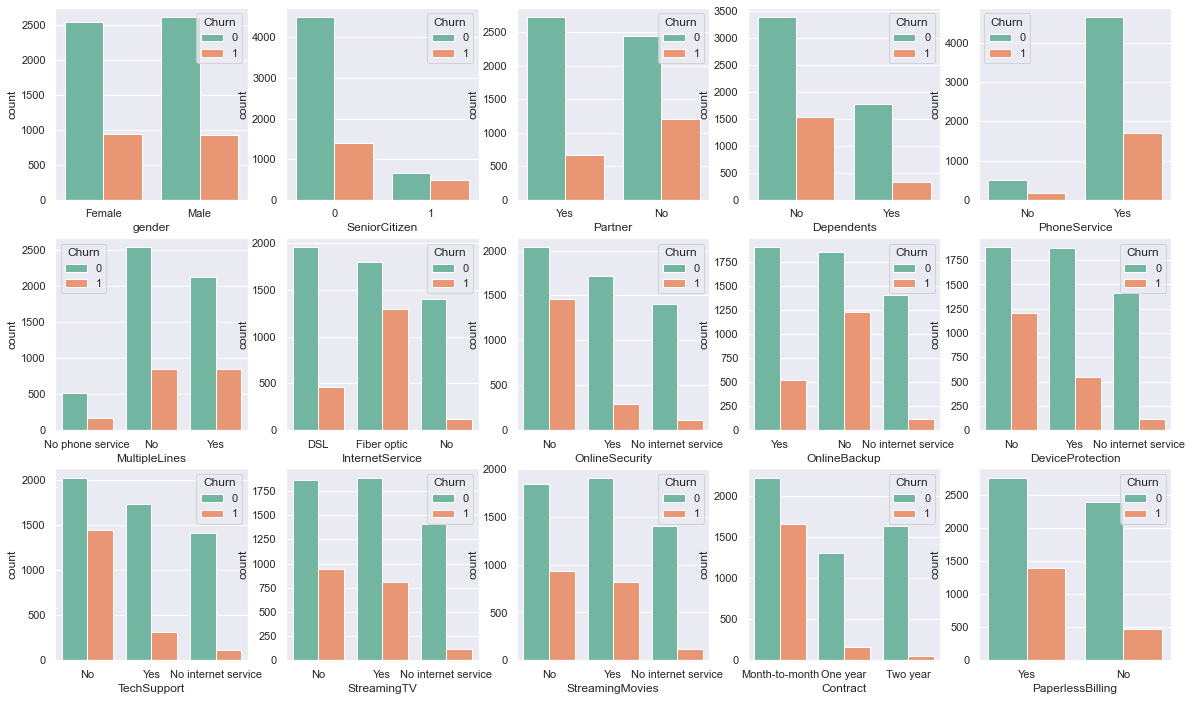

In [26]:
fig, ax = plt.subplots(3, 5, figsize=(20, 12))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable],hue=data["Churn"], ax=subplot, palette = "Set2")

C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


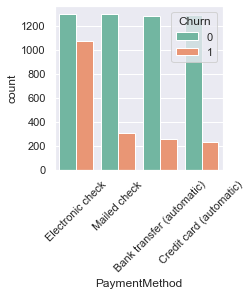

In [27]:
plt.figure(figsize=(3,3))
chart = sns.countplot(data.PaymentMethod,hue=data["Churn"], palette = "Set2")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

From above analysis, churn customers are likely to 
<b>
- not have partners and Dependents; Means likely to be Single.
- have Internet service and specifically Fiber optics
- not have online security service, online backup service, device protection service, Tech support service
- have streaming TV and streaming Movies services
- be with monthly based contract
- have paperless billing service
- have electronic check payment method
</b>

### Distribution of Tenure, Monthly Charges and Total Charges

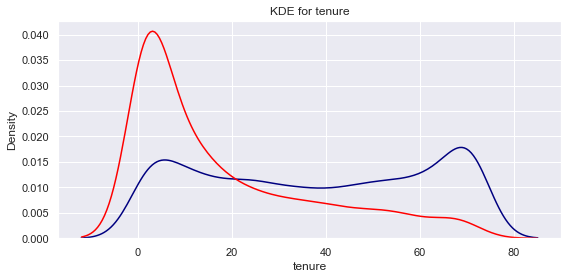

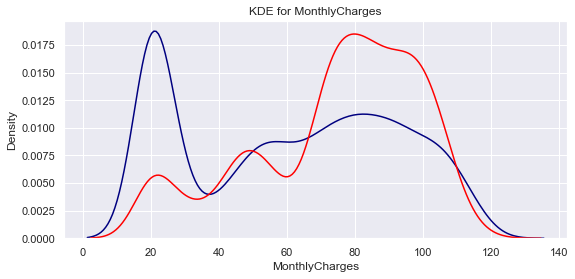

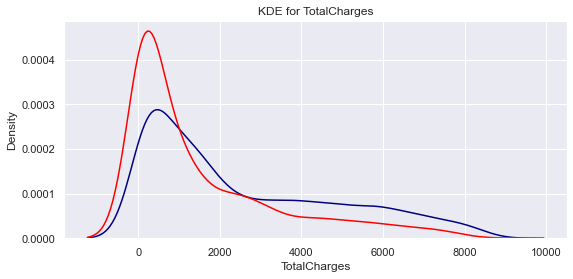

In [28]:
#There are only three numerical columns: tenure, monthly charges and total charges.
#The probability density distribution can be estimate using the seaborn kdeplot function.
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(data[data['Churn'] == 0][feature], color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(data[data['Churn'] == 1][feature], color= 'red', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

From the plots above we can conclude that:

1. Recent clients are more likely to churn. - more likely to leave company who's tenure is less than a year

2. Clients with higher MonthlyCharges are also more likely to churn.- more likely to have more than $65 monthly charges

3. Tenure and MonthlyCharges are probably important features.

### Let's check is there any relationship between Tenure and MonthlyCharges.

In [29]:
data['tenure']=data['tenure'].astype('float32')

In [30]:
X=data[data.Churn==1][['tenure','MonthlyCharges']]
X

,tenure,MonthlyCharges
2,2.0,53.85
4,2.0,70.70
5,8.0,99.65
8,28.0,104.80
13,49.0,103.70
...,...,...
7021,12.0,59.80
7026,9.0,44.20
7032,1.0,75.75
7034,67.0,102.95


In [31]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [32]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0)


In [33]:
X_scaled = StandardScaler().fit_transform(X)

In [34]:
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.3, min_samples = 10)
clusters = dbscan.fit_predict(X_scaled)
labels = dbscan.labels_

In [35]:
labels

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0,  2,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2,  0,  1,  0,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2,  2,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  2,  2,
        2,  2,  1,  2,  2

In [36]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 3


No handles with labels found to put in legend.


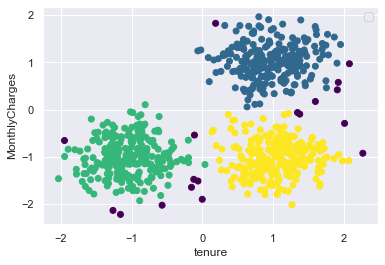

In [37]:
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis")
plt.xlabel("tenure")
plt.ylabel("MonthlyCharges")
plt.legend()

Based on DBSCAN cluster graph, we can see that there are three groups.
1. Low Tenure and Low Monthly Charges (Green cluster)

2. High Tenure and Low Monthly Charges (Yellow cluster)

3. High Tenure and High Monthly Charges (Blue cluster)

In [38]:
X_df = pd.DataFrame(X)
db_cluster = pd.DataFrame(labels)  

df = pd.concat([X_df, db_cluster], axis=1)
df.columns = ['tenure', 'MonthlyCharges', 'db_cluster']
df.head()

,tenure,MonthlyCharges,db_cluster
0,0.840220,1.148022,0
1,-1.154748,-1.204117,1
2,0.678636,0.724180,0
3,0.450783,-1.427097,2
4,1.492116,1.480952,0


In [39]:
view_cluster = df['db_cluster'].value_counts().T
view_cluster = pd.DataFrame(data=view_cluster)
view_cluster = view_cluster.reset_index()
view_cluster.columns = ['db_cluster', 'count']
view_cluster.sort_values(by='db_cluster', ascending=False)

,db_cluster,count
0,2,245
1,1,244
2,0,243
3,-1,18


<Figure size 720x576 with 0 Axes>

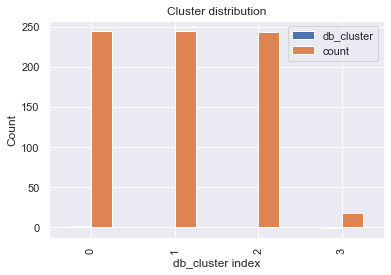

In [40]:
StBar = view_cluster.sort_values(by='db_cluster', ascending=False)
plt.figure(figsize=(10,8))
StBar.plot(kind='bar')
plt.xlabel("db_cluster index")
plt.ylabel("Count")
plt.title("Cluster distribution")
plt.xticks(rotation=90,ha='center')
plt.legend()
plt.show()

## 5. Data Preprocessing

In [41]:
data["gender"].unique()
data["Partner"].unique()
data["Dependents"].unique()
data["SeniorCitizen"].unique()
data["PhoneService"].unique()
data["MultipleLines"].unique()
data["InternetService"].unique()
data["OnlineSecurity"].unique()
data["OnlineBackup"].unique()
data["DeviceProtection"].unique()
data["TechSupport"].unique()
data["StreamingTV"].unique()
data["StreamingMovies"].unique()
data["Contract"].unique()
data["PaperlessBilling"].unique()
data["PaymentMethod"].unique()
data["Churn"].unique()

array([0, 1])

In [42]:
data_main = data.copy()

In [43]:
from sklearn.preprocessing import LabelEncoder
categorical = ["gender","Partner","Dependents","SeniorCitizen","PhoneService","MultipleLines"
                    ,"InternetService","OnlineSecurity","OnlineBackup","DeviceProtection"
                    ,"TechSupport","StreamingTV","StreamingMovies","Contract"
                    ,"PaperlessBilling","PaymentMethod","Churn"]
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(data_main[col])
    data_main[col] = label_encoder.transform(data_main[col])

In [44]:
data_main["gender"].unique()
data_main["Partner"].unique()
data_main["Dependents"].unique()
data_main["SeniorCitizen"].unique()
data_main["PhoneService"].unique()
data_main["MultipleLines"].unique()
data_main["InternetService"].unique()
data_main["OnlineSecurity"].unique()
data_main["OnlineBackup"].unique()
data_main["DeviceProtection"].unique()
data_main["TechSupport"].unique()
data_main["StreamingTV"].unique()
data_main["StreamingMovies"].unique()
data_main["Contract"].unique()
data_main["PaperlessBilling"].unique()
data_main["PaymentMethod"].unique()
data_main["Churn"].unique()

array([0, 1], dtype=int64)

In [45]:
data_main=data_main.drop('customerID',axis=1)

In [46]:
data_main=data_main.drop('TotalCharges',axis=1)

# Train & Test data split

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score

In [48]:
# Separating target variable and its features
y =  data_main['Churn']
X =  data_main.drop('Churn',axis=1)

### To avoid Data leakage

In [49]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4922, 18)
x test:  (2110, 18)
y train:  (4922,)
y test:  (2110,)


### Converting to a balanced dataset

In [51]:
from imblearn.over_sampling import SMOTE
#transform the dataset
oversample = SMOTE()
X_new,y_new= oversample.fit_resample(X_train,y_train)

In [52]:
pd.DataFrame(y_new).value_counts()

Churn
0        3608
1        3608
dtype: int64

# Model Creation/Evaluation

Applying classification models

1.Logistic Regression

2.KNN

3.Random Forest classifier

4.XGB

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

### 1.Logistic Regression

In [54]:
CV =[]
train_accuracy = []
test_accuracy = []
precisionscore=[]
Recallscore=[]
f1score=[]
auc=[]

def  Telecom_Churn(model,model_name):
    # Training model
    model.fit(X_new,y_new)
            
    # accuracy score of train set
    y_pred_train = model.predict(X_new)
    train_accuracy_model = accuracy_score(y_new,y_pred_train)
    train_accuracy.append(round(train_accuracy_model,2))
    
    # accuracy score of test set
    y_pred_test = model.predict(X_test)
    test_accuracy_model = accuracy_score(y_test,y_pred_test)
    test_accuracy.append(round(test_accuracy_model,2))
    
    # accuracy score of train set using Cross validation
    cross_val = cross_val_score(model ,X_new,y_new ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    #confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred_test)
    true_negative = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_positive = conf_mat[1][1]
    Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
    # Precison
    Precision = true_positive/(true_positive+false_positive)
    precisionscore.append(round(Precision,2))
    # Recall
    Recall = true_positive/(true_positive+false_negative)
    Recallscore.append(round(Recall,2)) 
    # f1
    f1=2*((Precision * Recall )) /(Precision + Recall)
    f1score.append(round(f1,2)) 
    # Area Under Curve
    auc_value = roc_auc_score(y_test,y_pred_test)
    auc.append(round(auc_value,4))
      # Printing results
    print("Train accuracy :",round(train_accuracy_model,2))
    print("Test accuracy :",round(test_accuracy_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    print("confusion_matrix:",conf_mat)
    print("Accuracy:",Accuracy)
    print("Precision:",Precision)
    print("Recall:",Recall)
    print("F1score:",f1)
    print("Train auc_value :",auc_value)
    
    
    # Plotting Graphs ROC & AUC CURVE
    y_pred_prob = model.predict_proba(X_test)
    y_pred_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
    plt.plot(fpr, tpr, color='orange',label='ROC Curve  (AUC = %0.2f)' % (auc_value))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label=' Random ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [55]:
from sklearn.linear_model  import  LogisticRegression

In [56]:
log_reg = LogisticRegression()

Train accuracy : 0.77
Test accuracy : 0.75
Train CV scores : [0.75831025 0.76091476 0.78863479 0.78170478 0.78794179]
Train CV mean : 0.78
confusion_matrix: [[1141  414]
 [ 115  440]]
Accuracy: 0.7492890995260664
Precision: 0.5152224824355972
Recall: 0.7927927927927928
F1score: 0.6245564229950319
Train auc_value : 0.7632774253353031


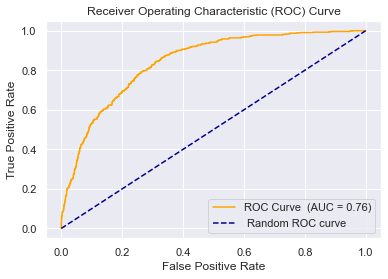

In [57]:
Telecom_Churn(log_reg,"LogisticRegression.pkl")

### 2.KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier()
# we are tuning the hyperparameters right now, we are passing the different values for both parameters
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }
rnd_search = RandomizedSearchCV(KNeighborsClassifier(), param_grid, n_iter =10, cv=9)
rnd_search.fit(X_new,y_new)

RandomizedSearchCV(cv=9, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [18, 20, 25, 27, 30, 32,
                                                      34],
                                        'n_neighbors': [3, 5, 7, 9, 10, 11, 12,
                                                        13]})

In [60]:
# let's see the  best parameters according to randomsearch
rnd_search.best_params_


{'n_neighbors': 5, 'leaf_size': 27, 'algorithm': 'kd_tree'}

In [61]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn_1 = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size =27, n_neighbors =3)

Train accuracy : 0.9
Test accuracy : 0.68
Train CV scores : [0.77770083 0.78932779 0.80803881 0.81635482 0.81704782]
Train CV mean : 0.8
confusion_matrix: [[1078  477]
 [ 202  353]]
Accuracy: 0.6781990521327014
Precision: 0.42530120481927713
Recall: 0.6360360360360361
F1score: 0.5097472924187726
Train auc_value : 0.6646418122302367


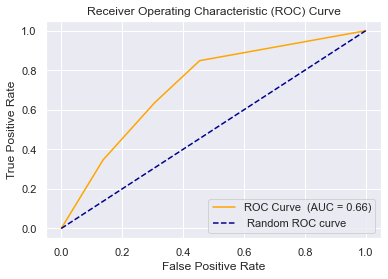

In [62]:
Telecom_Churn(knn_1,"knn_1.pkl")

### 3.Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(random_state=6)
# we are tuning the hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
rnd_search = RandomizedSearchCV(RandomForestClassifier(), grid_param, n_iter =10, cv=9)
rnd_search.fit(X_new,y_new)

In [ ]:
# let's see the  best parameters according to randomsearch
rnd_search.best_params_

In [ ]:
rand_clf_1=RandomForestClassifier(criterion= 'entropy',
 max_depth = 16,
 max_features = 'log2',
 min_samples_leaf = 6,
 min_samples_split= 2,
 n_estimators = 115,random_state=6)

In [ ]:
Telecom_Churn(rand_clf_1,"rand_clf_1.pkl")

### XGB

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
xgb_1 = XGBClassifier(objective='binary:logistic')
param_grid={
   
    'learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
}
rnd_search = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'), param_grid, n_iter =5, cv=5)
rnd_search.fit(X_new,y_new)

In [ ]:
# let's see the  best parameters according to randomsearch
rnd_search.best_params_

In [ ]:
xgb_2=XGBClassifier(learning_rate= 0.1, max_depth= 10, n_estimators= 50)

In [ ]:
Telecom_Churn(xgb_2,"xgb_2.pkl")

In [ ]:
Technique = ["LogisticRegression","KNN","RandomForest","XGB"]
results=pd.DataFrame({'Model': Technique,'Train accuracy ': train_accuracy,'Test accuracy': test_accuracy,'CV score mean(Train)': CV,'AUC_value':auc,'Precision':precisionscore,'Recall':Recallscore,'f1 score':f1score})
display(results)

# Final model creation

In [ ]:
X

In [ ]:
finalmodel = LogisticRegression()

In [ ]:
finalmodel.fit(X_new,y_new)

In [ ]:
import numpy as np
finalmodel.predict([[0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85]])

In [ ]:
import pickle 
filename = 'finalized_Churn_model.pk'
pickle.dump(finalmodel, open(filename, 'wb'))

In [ ]:
loaded_model1 = pickle.load(open(filename, 'rb'))

In [ ]:
loaded_model1.predict([[0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85]])

In [ ]:
type(loaded_model1)

In [ ]:
loaded_model1

### Logistic regression Coefficient

In [ ]:
existing_cust = pd.DataFrame(data_main[data_main['Churn']==0])

In [ ]:
existing_cust 

In [ ]:
existing_cust1=existing_cust.drop('Churn',axis=1)
existing_cust1.columns

In [ ]:
 finalmodel.coef_

* Based on Feature importance graph, it tells that gender, SeniorCitizen, MultipleLines, Internet sevice type, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, MonthlyCharges. 

* Monthly Charges and PaperlessBilling are some important features to predict whether customer will leave a company or not.

## Retention plan

### Prediction on Existing Customer

Since we generated a model based on Churn and Existing customers, which help to classify both of them. Now we can use same model on existing customers to find the probability of churn.

In [ ]:
existing_cust2=existing_cust.drop('Churn',axis=1)

In [ ]:
existing_customer_churn_prob = finalmodel.predict_proba(existing_cust2)

In [ ]:
existing_cust['Churn_proba'] = existing_customer_churn_prob[:][:,1]

In [ ]:
plt.hist(existing_cust['Churn_proba']
         , bins = 10)

plt.xlabel("Probability of Churn", fontsize=13)
plt.ylabel("Customers", fontsize=13)
plt.title("Existing customers' Churn probability distribution", fontsize=14)

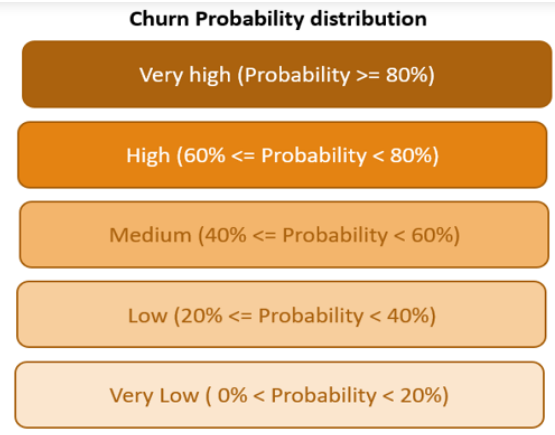

In [ ]:
existing_cust.loc[existing_cust['Churn_proba'] >= 0.8 , 'Churn_type'] = 'Very high'
existing_cust.loc[(existing_cust['Churn_proba'] >= 0.6) & (existing_cust['Churn_proba'] < 0.8)  , 'Churn_type'] = 'High'
existing_cust.loc[(existing_cust['Churn_proba'] >= 0.4) & (existing_cust['Churn_proba'] < 0.6) , 'Churn_type'] = 'Medium'
existing_cust.loc[(existing_cust['Churn_proba'] >= 0.2) & (existing_cust['Churn_proba'] < 0.4) , 'Churn_type'] = 'Low'
existing_cust.loc[(existing_cust['Churn_proba'] > 0.0) & (existing_cust['Churn_proba'] < 0.2) , 'Churn_type'] = 'Very low'

In [ ]:
existing_cust['Churn_type'].value_counts()

In [ ]:
existing_cust['Churn_type'].value_counts().plot(kind = 'barh')
plt.title("Existing customer risk type distribution", fontsize=14)
plt.ylabel("Risk type", fontsize = 13)
plt.xlabel("Customers", fontsize = 13)

We can provide retension plans to high and very high risk type customers.

In [ ]:
existing_cust.head(2) 

In [ ]:
data['PaymentMethod'].unique()

In [ ]:
data_main['PaymentMethod'].unique()